# Feature engineering

In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame({'vegetales': ['lechuga', 'tomate', 'morrón rojo',
                                   'morrón verde', 'brócoli', 'acelga',
                                   'zapallo', 'papa', 'espinaca'],
                     'precio_kg': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,vegetales,precio_kg
0,lechuga,4.0
1,tomate,3.0
2,morrón rojo,12.0
3,morrón verde,6.0
4,brócoli,7.5
5,acelga,8.0
6,zapallo,3.0
7,papa,5.0
8,espinaca,6.0


## Introducción

## Transformación de los datos

### Transformación con map



In [3]:
vegetal_a_color = {
      'lechuga': 'verde',
      'tomate': 'rojo',
      'morrón rojo': 'rojo',
      'morrón verde': 'verde',
      'brócoli': 'verde',
      'zapallo': 'naranja'
}

In [4]:
data['color'] = data['vegetales'].map(vegetal_a_color)
data

,vegetales,precio_kg,color
0,lechuga,4.0,verde
1,tomate,3.0,rojo
2,morrón rojo,12.0,rojo
3,morrón verde,6.0,verde
4,brócoli,7.5,verde
5,acelga,8.0,NaN
6,zapallo,3.0,naranja
7,papa,5.0,NaN
8,espinaca,6.0,NaN


### Discretización y binning


In [5]:
edades = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]



In [6]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(edades, bins)

In [7]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [8]:
edades

[20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [9]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

### Variables dummies


In [10]:
df = pd.DataFrame({'animales': ['jirafa', 'jirafa', 'koala',
                                'oso', 'koala', 'jirafa'], 
                   'unDato': range(6)})

In [11]:
df

,animales,unDato
0,jirafa,0
1,jirafa,1
2,koala,2
3,oso,3
4,koala,4
5,jirafa,5


In [12]:
pd.get_dummies(df)

,unDato,animales_jirafa,animales_koala,animales_oso
0,0,1,0,0
1,1,1,0,0
2,2,0,1,0
3,3,0,0,1
4,4,0,1,0
5,5,1,0,0


### Label Encoder (scikit learn)


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [14]:
le.transform(["tokyo", "tokyo", "amsterdam"]) 

array([2, 2, 0], dtype=int64)

In [15]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1], dtype=int64)

In [16]:
integer_encoded = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])

In [17]:
integer_encoded

array([1, 1, 2, 0], dtype=int64)

### OneHotEncoder


In [18]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)


[[1]
 [1]
 [2]
 [0]]


C:\Users\Darwoft\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [19]:
onehot_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### Imputer

In [20]:
from sklearn.preprocessing import Imputer

In [21]:
from numpy import nan
import numpy as np
X = np.array([[ nan, 0, 98 ],
              [3, 7, 99 ], 
              [3, 5, 210 ], 
              [4, nan,202 ], 
              [8, 8, 101 ]])
X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [22]:
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)

C:\Users\Darwoft\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
X2

array([[  4.5,   0. ,  98. ],
       [  3. ,   7. ,  99. ],
       [  3. ,   5. , 210. ],
       [  4. ,   5. , 202. ],
       [  8. ,   8. , 101. ]])

### Pipelines

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(Imputer(strategy='mean'),
                     StandardScaler())

C:\Users\Darwoft\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
X

array([[ nan,   0.,  98.],
       [  3.,   7.,  99.],
       [  3.,   5., 210.],
       [  4.,  nan, 202.],
       [  8.,   8., 101.]])

In [26]:
pipe.fit(X)

Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [27]:
pipe.fit_transform(X)

array([[ 0.        , -1.81369063, -0.84088374],
       [-0.81348922,  0.72547625, -0.82177275],
       [-0.81348922,  0.        ,  1.2995476 ],
       [-0.27116307,  0.        ,  1.14665965],
       [ 1.89814151,  1.08821438, -0.78355076]])

## Detección de outliers

### Filtrando y transformando outliers

In [28]:
import seaborn as sns


In [29]:
from seaborn import load_dataset
tips = load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


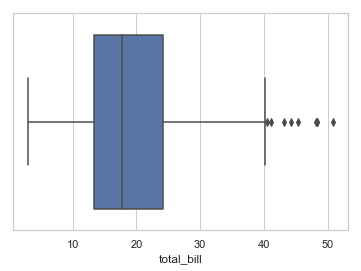

In [30]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

In [31]:
q75, q25 = np.percentile(tips.total_bill, [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

In [32]:
tips.total_bill[tips.total_bill > max]

59     48.27
102    44.30
142    41.19
156    48.17
170    50.81
182    45.35
184    40.55
197    43.11
212    48.33
Name: total_bill, dtype: float64

In [33]:
s=tips.total_bill[tips.total_bill < max]
s.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

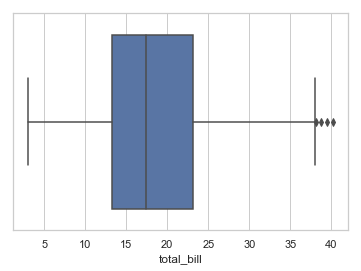

In [34]:
ax = sns.boxplot(x=s)